In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential

In [ ]:
df=pd.read_csv(r"/content/Book1.csv")

In [ ]:
df.shape

(14615, 12)

In [ ]:
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [ ]:

df.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [ ]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],errors='coerce', utc=True)
df


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
14610,2007-03-09 18:00:00+00:00,Clear,rain,9.027778,7.511111,0.89,9.8693,315,8.0983,0,1023.24,Mostly cloudy until afternoon.
14611,2007-03-09 19:00:00+00:00,Mostly Cloudy,rain,8.866667,7.422222,0.89,9.3058,313,9.6761,0,1023.39,Mostly cloudy until afternoon.
14612,2007-03-09 20:00:00+00:00,Overcast,rain,8.844444,8.027778,0.93,6.4722,314,7.8729,0,1023.68,Mostly cloudy until afternoon.
14613,2007-03-09 21:00:00+00:00,Overcast,rain,8.850000,7.172222,0.93,10.5616,325,8.1788,0,1023.49,Mostly cloudy until afternoon.


In [ ]:
df['Precip Type'].fillna(method='ffill', inplace=True)
df.fillna(method='ffill', inplace=True)
df

<ipython-input-13-7366af04142b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].fillna(method='ffill', inplace=True)
<ipython-input-13-7366af04142b>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Precip Type'].fillna(method='ffill', inplace=True)
<ipython-input-13-7366af04142b>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
14610,2007-03-09 18:00:00+00:00,Clear,rain,9.027778,7.511111,0.89,9.8693,315,8.0983,0,1023.24,Mostly cloudy until afternoon.
14611,2007-03-09 19:00:00+00:00,Mostly Cloudy,rain,8.866667,7.422222,0.89,9.3058,313,9.6761,0,1023.39,Mostly cloudy until afternoon.
14612,2007-03-09 20:00:00+00:00,Overcast,rain,8.844444,8.027778,0.93,6.4722,314,7.8729,0,1023.68,Mostly cloudy until afternoon.
14613,2007-03-09 21:00:00+00:00,Overcast,rain,8.850000,7.172222,0.93,10.5616,325,8.1788,0,1023.49,Mostly cloudy until afternoon.


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

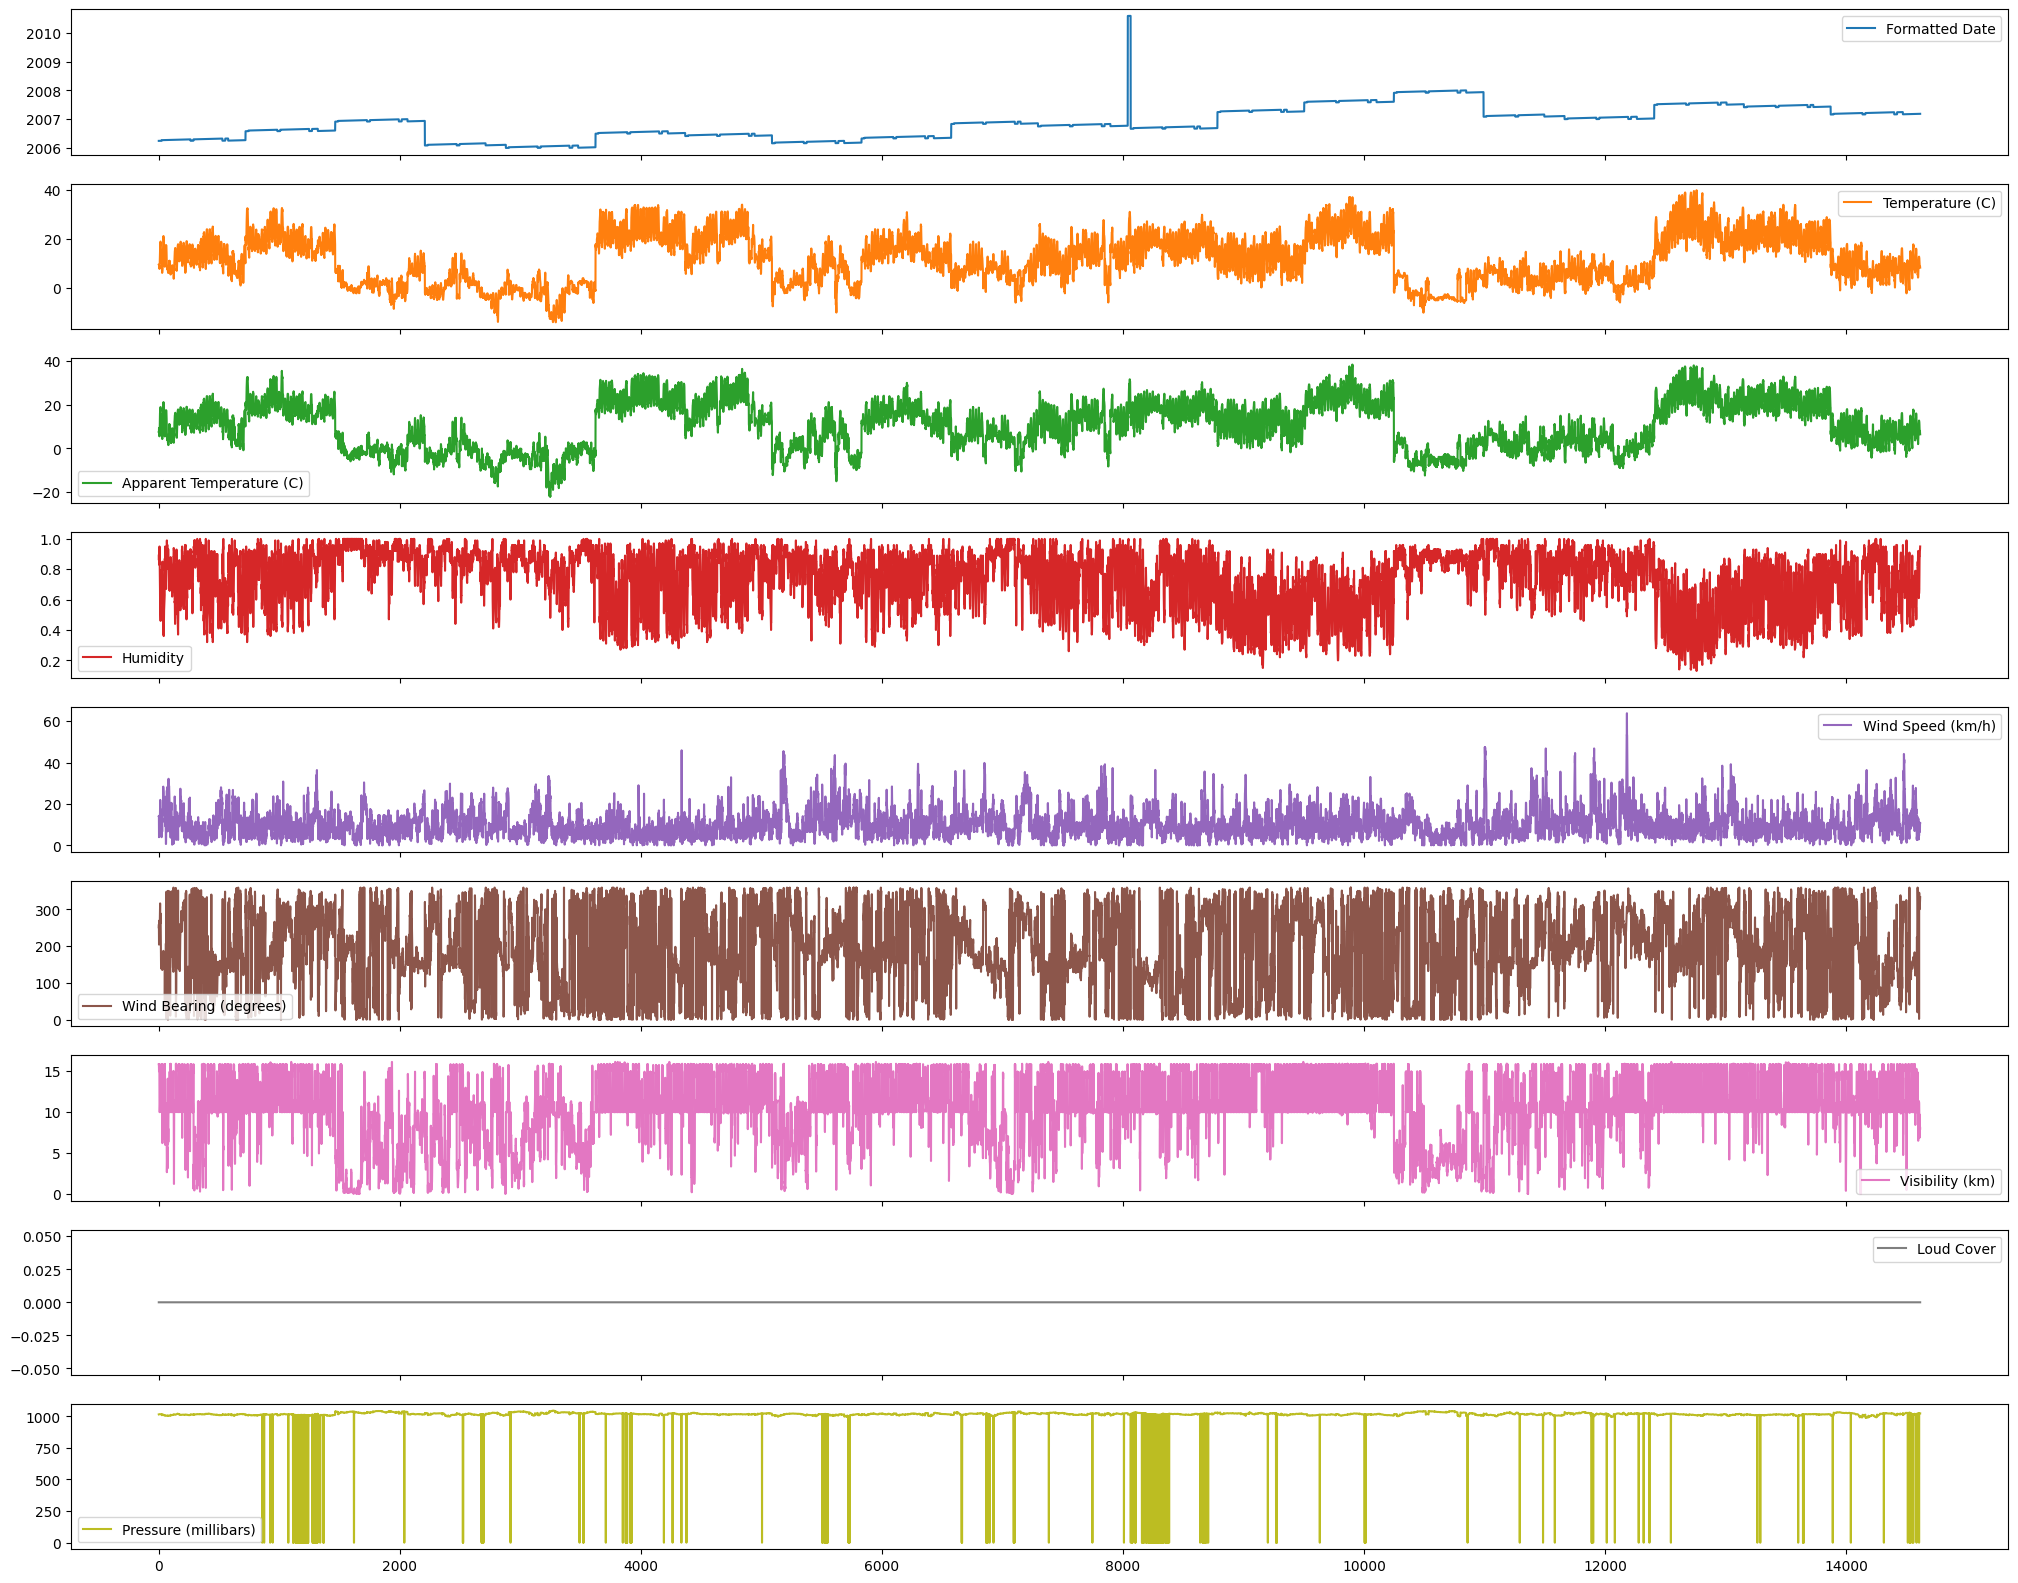

In [ ]:
df.plot(subplots=True, figsize=(25,20))

array([[<Axes: title={'center': 'Formatted Date'}>,
        <Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>],
       [<Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>],
       [<Axes: title={'center': 'Visibility (km)'}>,
        <Axes: title={'center': 'Loud Cover'}>,
        <Axes: title={'center': 'Pressure (millibars)'}>]], dtype=object)

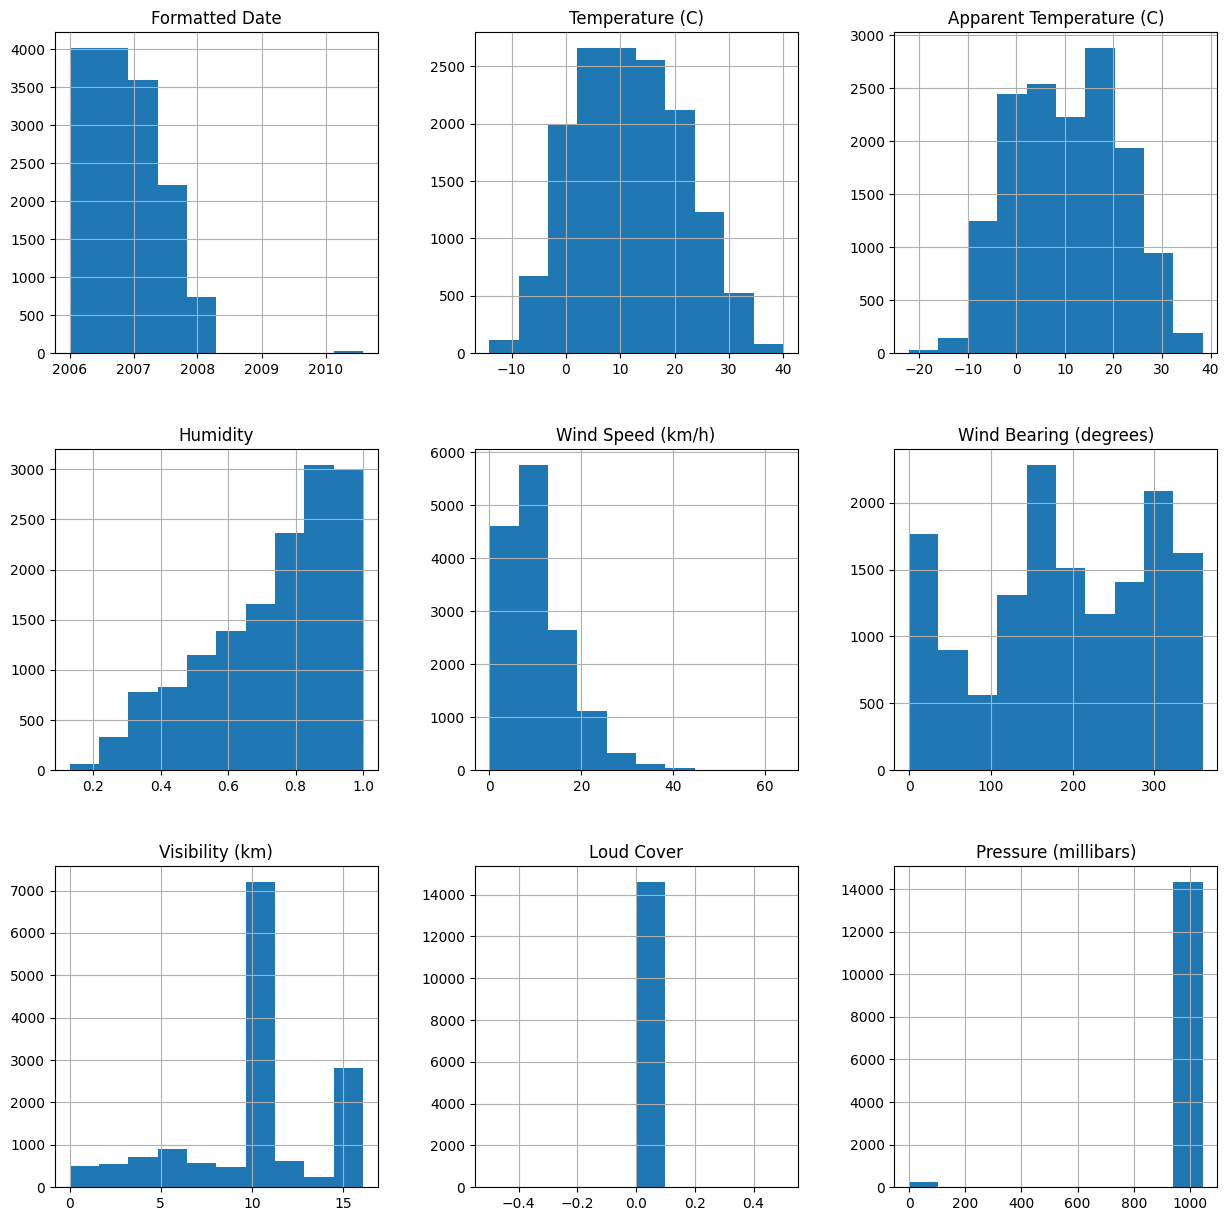

In [ ]:
df.hist(bins=10,figsize=(15,15))

In [ ]:
numerical_columns = [
    'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
    'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'
]

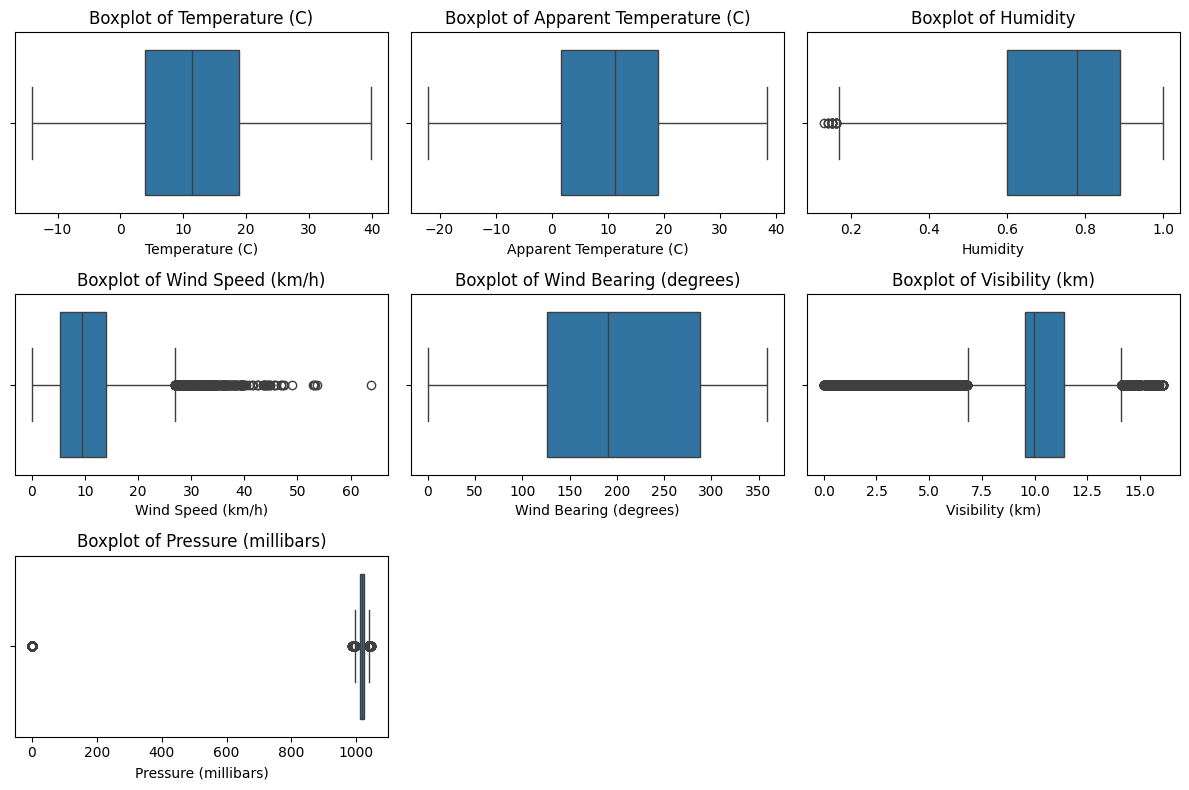

In [ ]:
#outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Clip values outside the bounds
        df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)

        # Print number of outliers handled
        num_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        print(f"{column}: {num_outliers} outliers handled.")

    return df_cleaned

In [ ]:
selected_columns = [ 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
data_selected = df[selected_columns]

In [ ]:
# Remove outliers using the IQR method
data_cleaned = remove_outliers_iqr(data_selected, selected_columns)

Humidity: 17 outliers handled.
Wind Speed (km/h): 397 outliers handled.
Visibility (km): 5707 outliers handled.
Pressure (millibars): 692 outliers handled.


In [ ]:
# Display before and after statistics
print("\n--- Original Data Statistics ---")
print(df.describe())

print("\n--- Cleaned Data Statistics ---")
print(data_cleaned.describe())


--- Original Data Statistics ---
       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     14615.000000              14615.000000  14615.000000   
mean         11.701923                 10.611096      0.730402   
std           9.919081                 11.008374      0.195268   
min         -14.088889                -22.094444      0.130000   
25%           3.866667                  1.580556      0.600000   
50%          11.338889                 11.338889      0.780000   
75%          18.916667                 18.916667      0.890000   
max          39.905556                 38.377778      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       14615.000000            14615.000000      14615.00000     14615.0   
mean           10.455786              191.837906         10.06639         0.0   
std             6.834848              104.843021          3.82091         0.0   
min             0.000000                0.00000

In [ ]:
df.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [ ]:
df.drop(['Loud Cover'], axis=1, inplace=True)

In [ ]:
# Drop Irrelevant Columns
columns_to_drop = [ 'Partly cloud','Loud Cover','Precip Type' 'Summary', 'Daily Summary']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [ ]:

df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [ ]:
scaler = MinMaxScaler()

In [ ]:

scaled_data = scaler.fit_transform(data_selected)

In [ ]:
 #Function to create sequences for LSTM input
def create_sequences(data, target_index, seq_length=30):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, target_index])
    return np.array(X), np.array(y)


In [ ]:
# Target is 'Temperature (C)'
features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']

# Correctly find the target index
target_index = features.index('Temperature (C)')

seq_length = 30  # Use past 30 time steps
X, y = create_sequences(scaled_data, target_index, seq_length)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


# Split data into training and testing sets (80% training, 20% testing)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

Shape of X: (14585, 30, 4)
Shape of y: (14585,)


In [ ]:
# Verify the shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (11668, 30, 4), y_train shape: (11668,)
X_test shape: (2917, 30, 4), y_test shape: (2917,)


In [ ]:
X.shape,y.shape

((14585, 30, 4), (14585,))

**Vanilla Lstm model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.regularizers import l2


In [ ]:
# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=False, kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.4),  # Prevent overfitting by randomly dropping 40% of the units
    Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

# Define early stopping and learning rate scheduler
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,  # Increase patience to allow better generalization
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reduce learning rate by half
    patience=3,  # After 3 epochs of no improvement
    min_lr=1e-6
)


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,  # Use fewer epochs to prevent overfitting
    batch_size=64,  # Increase batch size to stabilize gradients
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.2257 - mae: 0.3079 - val_loss: 0.0687 - val_mae: 0.1456 - learning_rate: 0.0010
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0728 - mae: 0.1642 - val_loss: 0.0373 - val_mae: 0.1066 - learning_rate: 0.0010
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0418 - mae: 0.1231 - val_loss: 0.0276 - val_mae: 0.0967 - learning_rate: 0.0010
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0318 - mae: 0.1110 - val_loss: 0.0220 - val_mae: 0.0879 - learning_rate: 0.0010
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0272 - mae: 0.1063 - val_loss: 0.0196 - val_mae: 0.0856 - learning_rate: 0.0010
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0245 - mae: 0.1037 - val_loss: 0.0179 - val_mae: 0.0850 - learning_rate: 0.0010
Epoch 7/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0228 - mae: 0.1030 - val_loss: 0.0170 - val_mae: 0.0848 - learning_rate: 0.0010
Epoch 8/30
93

In [ ]:

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mae: 0.0650
Test Loss: [0.008071353659033775, 0.06225902959704399]


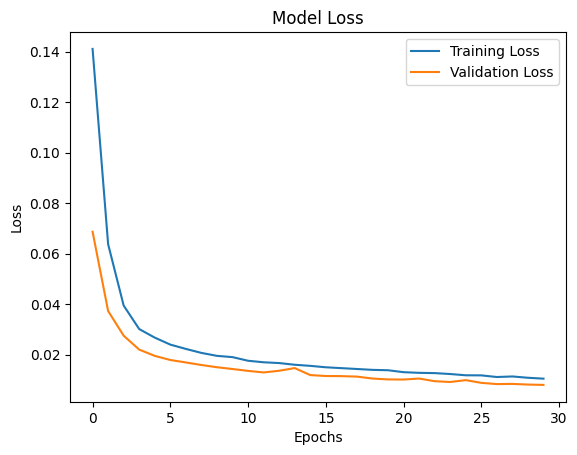

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
 #Predict on test data
y_pred = model.predict(X_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [ ]:
# Ensure y_test is reshaped properly
y_test_inv = scaler.inverse_transform(
    np.concatenate(
        (y_test.reshape(-1, 1), np.zeros((len(y_test), scaled_data.shape[1] - 1))),
        axis=1
    )
)[:, 0]

# Ensure y_pred is reshaped properly
y_pred_inv = scaler.inverse_transform(
    np.concatenate(
        (y_pred, np.zeros((len(y_pred), scaled_data.shape[1] - 1))),
        axis=1
    )
)[:, 0]


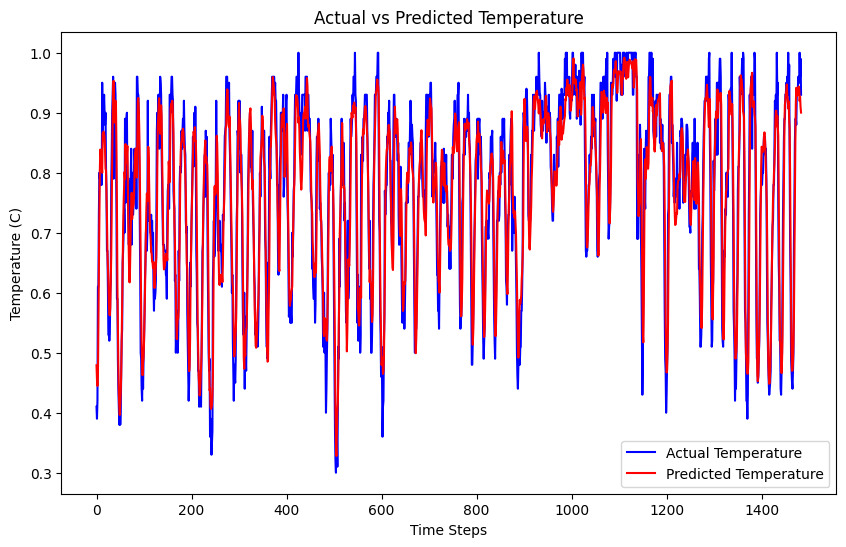

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Temperature', color='blue')
plt.plot(y_pred_inv, label='Predicted Temperature', color='red')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

**Stacked LSTM Model**

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define the model
def create_stacked_lstm_model(input_shape):
    model = Sequential()

    # First LSTM layer
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Second LSTM layer
    model.add(LSTM(64, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Third LSTM layer
    model.add(LSTM(32, return_sequences=False))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Dense output layer
    model.add(Dense(1))  # Output layer for regression (single value)

    return model

In [ ]:
# Set up input shape
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)

# Create the model
model = create_stacked_lstm_model(input_shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

# Compile the model
optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 30, 64)              │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 30, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,777 (249.13 KB)

 Trainable params: 63,457 (247.88 KB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [ ]:
# Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)


Epoch 1/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 1.1611 - val_loss: 0.0675 - learning_rate: 0.0010
Epoch 2/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.3339 - val_loss: 0.0396 - learning_rate: 0.0010
Epoch 3/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.2018 - val_loss: 0.0247 - learning_rate: 0.0010
Epoch 4/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.1320 - val_loss: 0.0185 - learning_rate: 0.0010
Epoch 5/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0801 - val_loss: 0.0160 - learning_rate: 0.0010
Epoch 6/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0561 - val_loss: 0.0146 - learning_rate: 0.0010
Epoch 7/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0404 - val_loss: 0.0139 - learning_rate: 0.0010
Epoch 8/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0331 - val_loss: 0.0106 - learning_rate: 0.0010
Epoch 9/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0272 - val_loss: 0.0112 - learning_rate: 0.

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0057
Test Loss: 0.005285203922539949


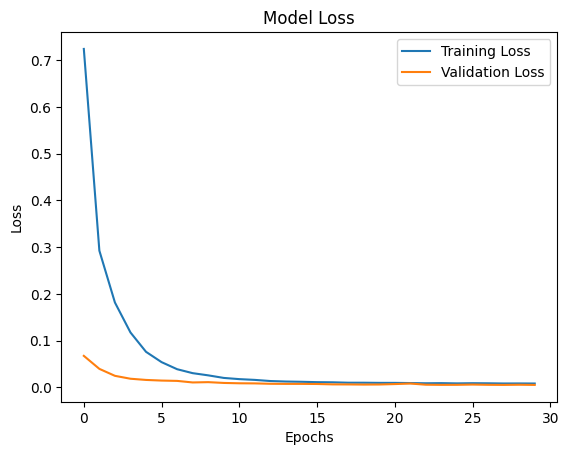

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
 #Predict on test data
y_pred = model.predict(X_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [ ]:
# Ensure y_test is reshaped properly
y_test_inv = scaler.inverse_transform(
    np.concatenate(
        (y_test.reshape(-1, 1), np.zeros((len(y_test), scaled_data.shape[1] - 1))),
        axis=1
    )
)[:, 0]

# Ensure y_pred is reshaped properly
y_pred_inv = scaler.inverse_transform(
    np.concatenate(
        (y_pred, np.zeros((len(y_pred), scaled_data.shape[1] - 1))),
        axis=1
    )
)[:, 0]


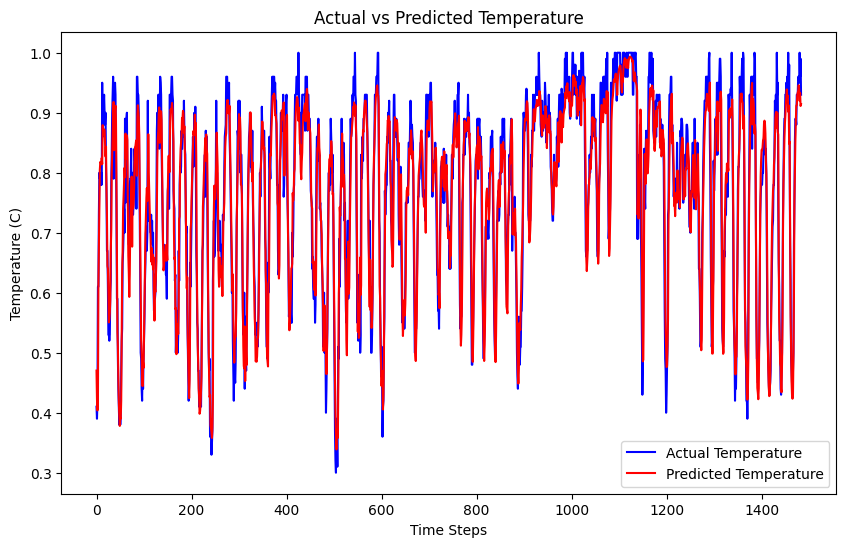

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Temperature', color='blue')
plt.plot(y_pred_inv, label='Predicted Temperature', color='red')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()


**Bidirectional LSTM Model**

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data_selected)
# Correctly scale the target feature
scaled_target = scaler.fit_transform(df[['Temperature (C)']])
num_features=4

In [ ]:
 #Function to create sequences for LSTM input
def create_sequences(data, target_index, seq_length=30):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])  # Take past 'seq_length' rows
        y.append(data[i, target_index])  # Target is the current row's temperature
    return np.array(X), np.array(y)

In [ ]:
# Find the target index and create sequences
target_feature = 'Temperature (C)'
target_index = features.index(target_feature)
seq_length = 30
X, y = create_sequences(scaled_data, target_index, seq_length)

In [ ]:

# Split data into training and testing sets (80% training, 20% testing)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [ ]:
# Define the Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(seq_length, num_features)),
    BatchNormalization(),
    Dropout(0.2),

    Bidirectional(LSTM(32, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.2),

    Bidirectional(LSTM(16)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_9 (Bidirectional)      │ (None, 30, 128)             │          35,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 30, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 30, 64)              │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 30, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ (None, 32)                  │          10,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,897 (347.25 KB)

 Trainable params: 88,449 (345.50 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Define early stopping and learning rate scheduler
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop after 5 epochs of no improvement
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reduce learning rate by half
    patience=3,  # After 3 epochs of no improvement
    min_lr=1e-6
)

In [ ]:

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 48s 96ms/step - loss: 0.1986 - mae: 0.3226 - val_loss: 0.0354 - val_mae: 0.1585 - learning_rate: 0.0010
Epoch 2/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 43s 103ms/step - loss: 0.0314 - mae: 0.1408 - val_loss: 0.0139 - val_mae: 0.0961 - learning_rate: 0.0010
Epoch 3/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 49s 125ms/step - loss: 0.0205 - mae: 0.1136 - val_loss: 0.0156 - val_mae: 0.0997 - learning_rate: 0.0010
Epoch 4/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 46s 126ms/step - loss: 0.0159 - mae: 0.0993 - val_loss: 0.0114 - val_mae: 0.0866 - learning_rate: 0.0010
Epoch 5/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 68s 88ms/step - loss: 0.0132 - mae: 0.0905 - val_loss: 0.0062 - val_mae: 0.0603 - learning_rate: 0.0010
Epoch 6/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - loss: 0.0115 - mae: 0.0848 - val_loss: 0.0067 - val_mae: 0.0639 - learning_rate: 0.0010
Epoch 7/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - loss: 0.0101 - mae: 0.0795 - val_loss: 0.0065 - val_mae: 0.0624 - learning_ra

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")


92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0044 - mae: 0.0495
Test Loss: [0.004407295025885105, 0.049569692462682724]


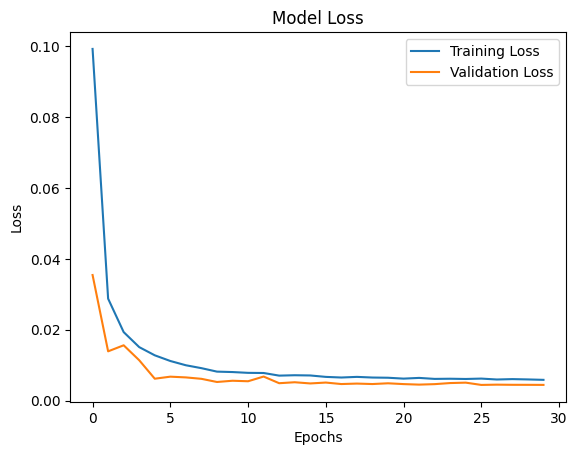

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step


In [ ]:
# Ensure y_test is reshaped properly
y_test_inv = scaler.inverse_transform(
    np.concatenate(
        (y_test.reshape(-1, 1), np.zeros((len(y_test), scaled_data.shape[1] - 1))),
        axis=1
    )
)[:, 0]

# Ensure y_pred is reshaped properly
y_pred_inv = scaler.inverse_transform(
    np.concatenate(
        (y_pred, np.zeros((len(y_pred), scaled_data.shape[1] - 1))),
        axis=1
    )
)[:, 0]


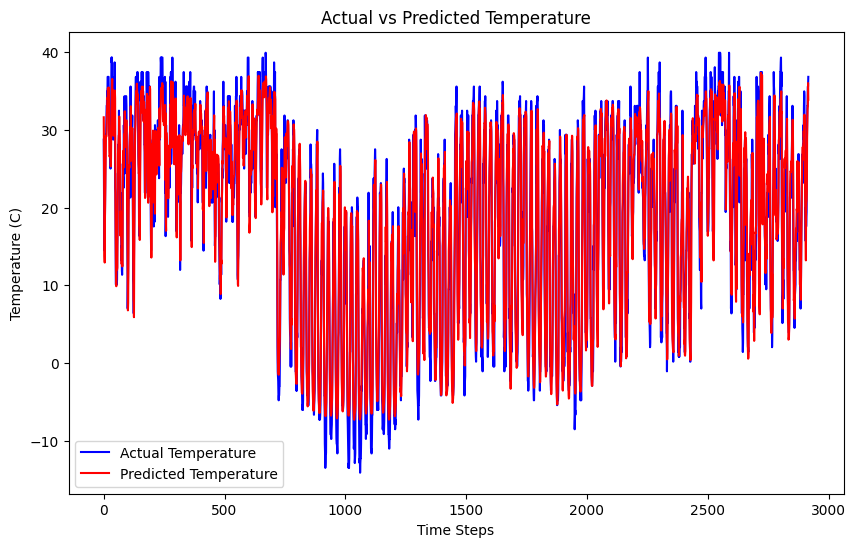

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Temperature', color='blue')
plt.plot(y_pred_inv, label='Predicted Temperature', color='red')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

**Convultional Neural networl LSTM Model**

In [ ]:
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, BatchNormalization, MaxPooling1D

In [ ]:
# Define the CNN Model
def create_cnn_model(input_shape):
    model = Sequential()

    # First Conv1D Layer
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    # Second Conv1D Layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    # Flatten the output
    model.add(Flatten())

    # Dense Layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))

    # Output Layer
    model.add(Dense(1))  # Predicting a single value (Temperature)

    return model

In [ ]:
# Build and Compile the Model
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
model = create_cnn_model(input_shape)

optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 28, 32)              │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 14, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 12, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,713 (123.88 KB)

 Trainable params: 31,521 (123.13 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [ ]:
# Train the Model
history =model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

Epoch 1/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.0078 - val_loss: 0.0817 - learning_rate: 0.0010
Epoch 2/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0651 - val_loss: 0.0325 - learning_rate: 0.0010
Epoch 3/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0315 - val_loss: 0.0214 - learning_rate: 0.0010
Epoch 4/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0224 - val_loss: 0.0175 - learning_rate: 0.0010
Epoch 5/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0191 - val_loss: 0.0154 - learning_rate: 0.0010
Epoch 6/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0170 - val_loss: 0.0152 - learning_rate: 0.0010
Epoch 7/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0150 - val_loss: 0.0111 - learning_rate: 0.0010
Epoch 8/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0134 - val_loss: 0.0096 - learning_rate: 0.0010
Epoch 9/30
365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0122 - val_loss: 0.0092 - learning_rate: 0.0010
Epoch 10/3

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086
Test Loss: 0.008201494812965393


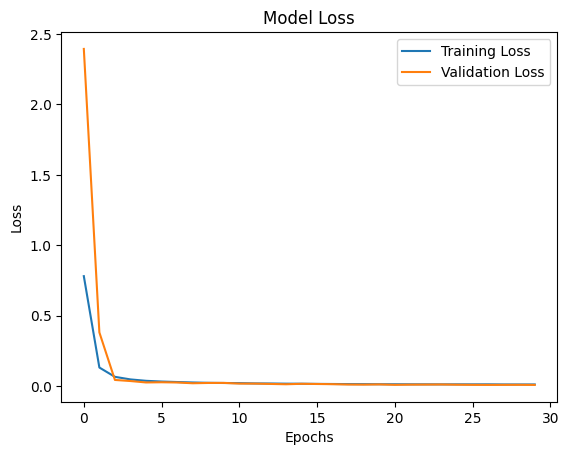

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
# Predict Temperature
y_pred = model.predict(X_test)

# Rescale Predictions and Actual Values
temp_scaler = scaler.scale_[-1]  # Scale factor for the target column
y_test_rescaled = y_test / temp_scaler
y_pred_rescaled = y_pred.flatten() / temp_scaler

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


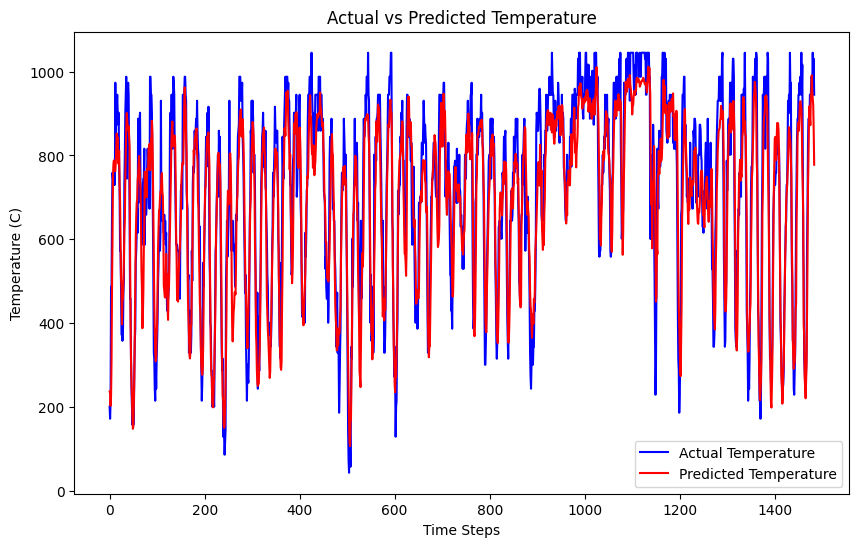

In [ ]:
# Plot Actual vs Predicted Temperatures
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Temperature', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Temperature', color='red')
plt.legend()
plt.title("Actual vs Predicted Temperature")
plt.xlabel("Time Steps")
plt.ylabel("Temperature (C)")
plt.show()

**Convultional LSTM model**

In [ ]:
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Dense, Dropout, Flatten

In [ ]:
# Function to create sequences for ConvLSTM input
def create_sequences(data, target_index, seq_length=30):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, target_index])
    return np.array(X), np.array(y)



In [ ]:
# Target is 'Temperature (C)'
target_index = features.index('Temperature (C)')
seq_length = 30  # Use past 30 time steps
X, y = create_sequences(scaled_data, target_index, seq_length)

# Reshape input for ConvLSTM (samples, time steps, rows, columns, features)
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

# Split data into training and testing sets (80% training, 20% testing)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [ ]:
def create_conv_lstm_model(input_shape):
    model = Sequential()

    # Convolutional layer with Dropout and regularization
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu',
                     kernel_regularizer=l2(1e-4), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))  # Increased Dropout

    # LSTM layers with Dropout
    model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(1e-4)))
    model.add(Dropout(0.4))

    model.add(LSTM(16, return_sequences=False, kernel_regularizer=l2(1e-4)))
    model.add(Dropout(0.4))

    # Dense layers with regularization
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(1e-4)))
    model.add(Dropout(0.4))

    # Output layer
    model.add(Dense(1))  # Single value output
    return model

In [ ]:
# Create the model
input_shape = (X_train.shape[1], X_train.shape[2])
model = create_conv_lstm_model(input_shape)


In [ ]:
# Compile the model
optimizer = Adam(learning_rate=1e-4)  # Reduce learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 28, 32)              │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 28, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 28, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 28, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 28, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,225 (47.75 KB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 0.6207 - val_loss: 0.3520 - learning_rate: 1.0000e-04
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.3226 - val_loss: 0.0908 - learning_rate: 1.0000e-04
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.1920 - val_loss: 0.0609 - learning_rate: 1.0000e-04
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1613 - val_loss: 0.0529 - learning_rate: 1.0000e-04
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1486 - val_loss: 0.0441 - learning_rate: 1.0000e-04
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1371 - val_loss: 0.0494 - learning_rate: 1.0000e-04
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1238 - val_loss: 0.0433 - learning_rate: 1.0000e-04
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1154 - val_loss: 0.0470 - learning_rate: 1.0000e-04
Epoch 9/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.1096 - val_loss

In [ ]:
 #Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144
Test Loss: 0.014187352731823921


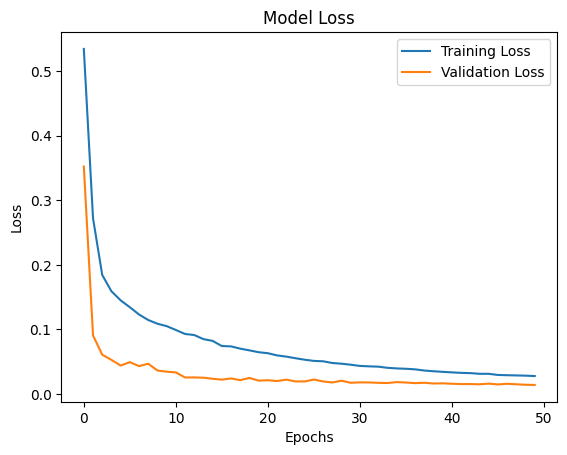

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [ ]:
# Rescale predictions and actual values back to original scale
y_test_rescaled = scaler.inverse_transform(
    np.concatenate((np.zeros((len(y_test), scaled_data.shape[1]-1)), y_test.reshape(-1, 1)), axis=1)
)[:, -1]

y_pred_rescaled = scaler.inverse_transform(
    np.concatenate((np.zeros((len(y_pred), scaled_data.shape[1]-1)), y_pred), axis=1)
)[:, -1]

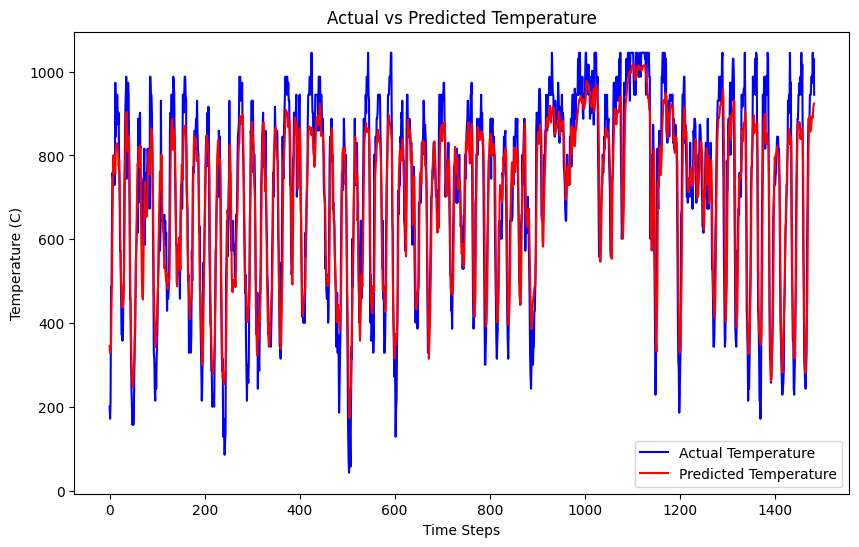

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Temperature', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Temperature', color='red')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")

# Predict on test data
y_pred = model.predict(X_test)

# Select a single example for demonstration
example_idx = 1 # Change this index to visualize other test samples
actual = y_test[example_idx]
predicted = y_pred[example_idx]

# Visualize actual vs. predicted temperature values for a specific sample
plt.figure(figsize=(10, 6))
plt.plot(range(len(actual)), actual, label="Actual", marker='o', color='blue')
plt.plot(range(len(predicted)), predicted, label="Predicted", marker='x', color='red', linestyle='--')
plt.title(f"Actual vs Predicted Temperature for Sample {example_idx}")
plt.xlabel("Future Time Steps")
plt.ylabel("Temperature")
plt.legend()
plt.show()

# Compare multiple samples at once
n_samples = 5  # Number of samples to visualize
plt.figure(figsize=(12, 8))
for i in range(n_samples):
    plt.subplot(n_samples, 1, i + 1)
    plt.plot(range(len(y_test[i])), y_test[i], label="Actual", marker='o', color='blue')
    plt.plot(range(len(y_pred[i])), y_pred[i], label="Predicted", marker='x', color='red', linestyle='--')
    plt.title(f"Sample {i}: Actual vs Predicted")
    plt.xlabel("Future Time Steps")
    plt.ylabel("Temperature")
    plt.tight_layout()
plt.legend()
plt.show()


NameError: name 'model' is not defined

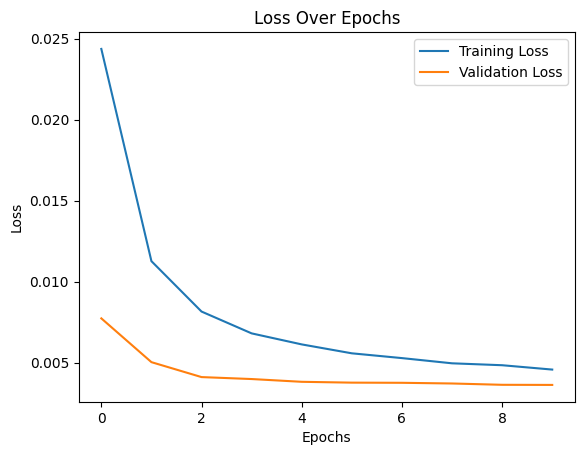

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:

# Predict on test data
y_pred = model.predict(X_test)

110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step


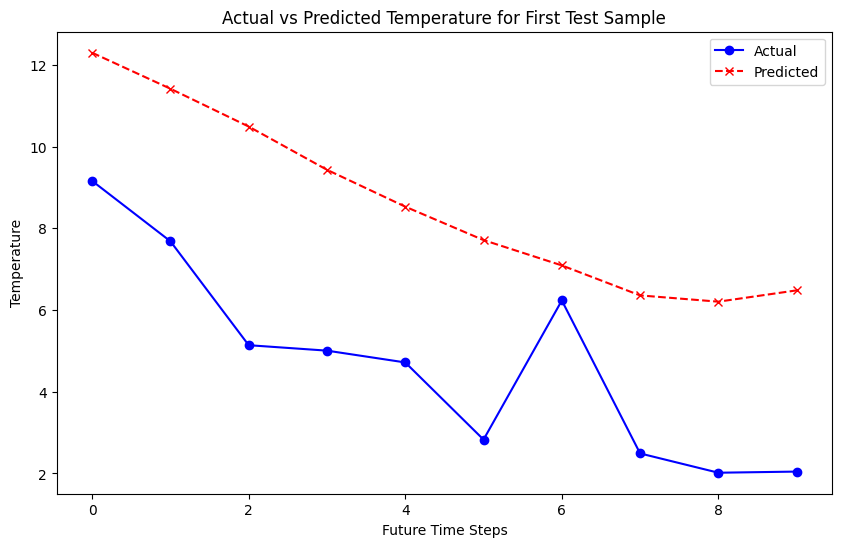

In [ ]:
# Inverse transform predictions and actual values
y_test_reshaped = y_test.reshape(-1, 1)
y_pred_reshaped = y_pred.reshape(-1, 1)

y_test_rescaled = scaler.inverse_transform(y_test_reshaped).reshape(y_test.shape)
y_pred_rescaled = scaler.inverse_transform(y_pred_reshaped).reshape(y_pred.shape)

# Visualize the results for the first test sample
plt.figure(figsize=(10, 6))
plt.plot(range(output_steps), y_test_rescaled[0], label="Actual", marker='o', color='blue')
plt.plot(range(output_steps), y_pred_rescaled[0], label="Predicted", marker='x', color='red', linestyle='--')
plt.title("Actual vs Predicted Temperature for First Test Sample")
plt.xlabel("Future Time Steps")
plt.ylabel("Temperature")
plt.legend()
plt.show()
